## standardize dediğine bakma normalizasyon işlemi aslında isim olarak bu
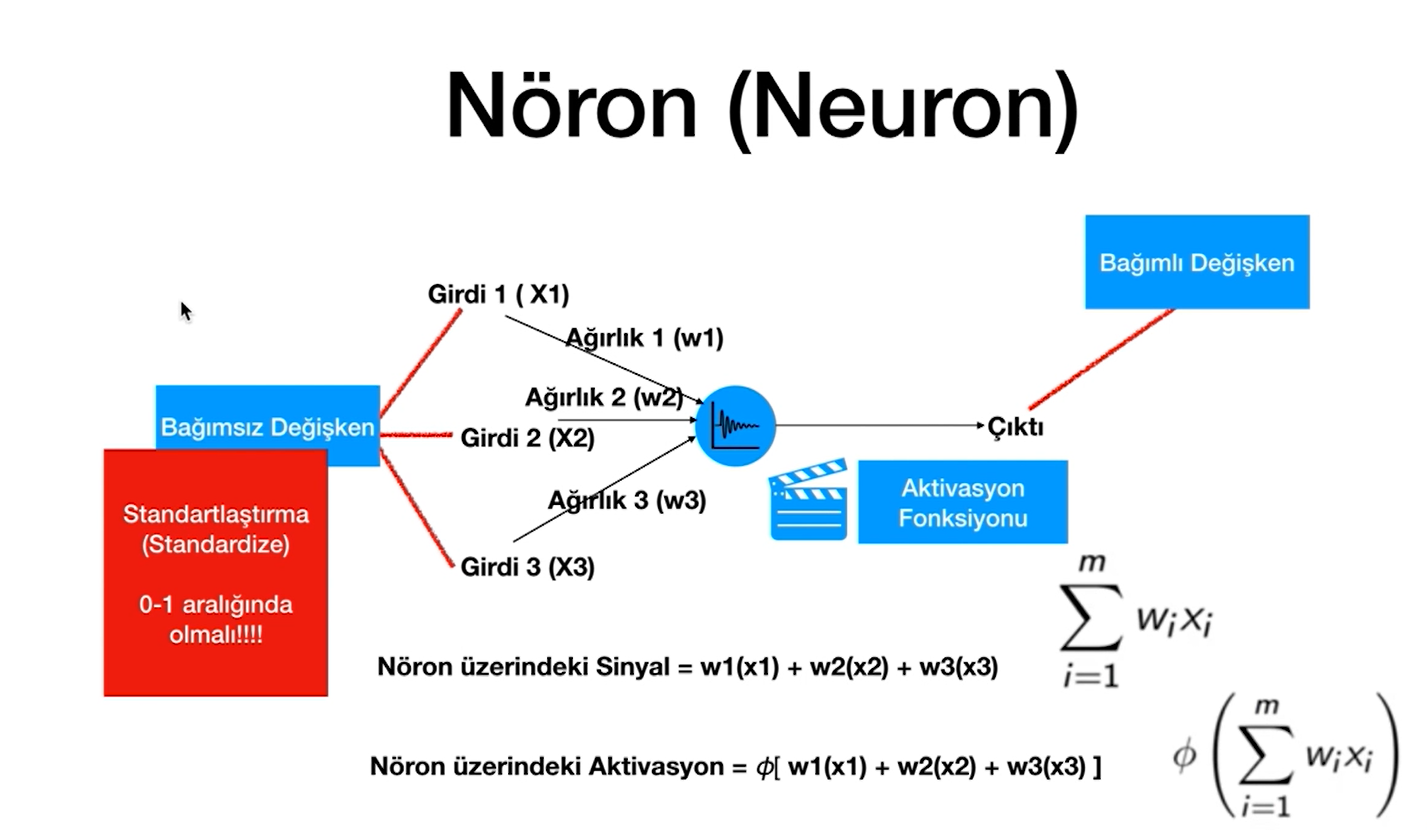
# Aktivasyon Fonksiyonları
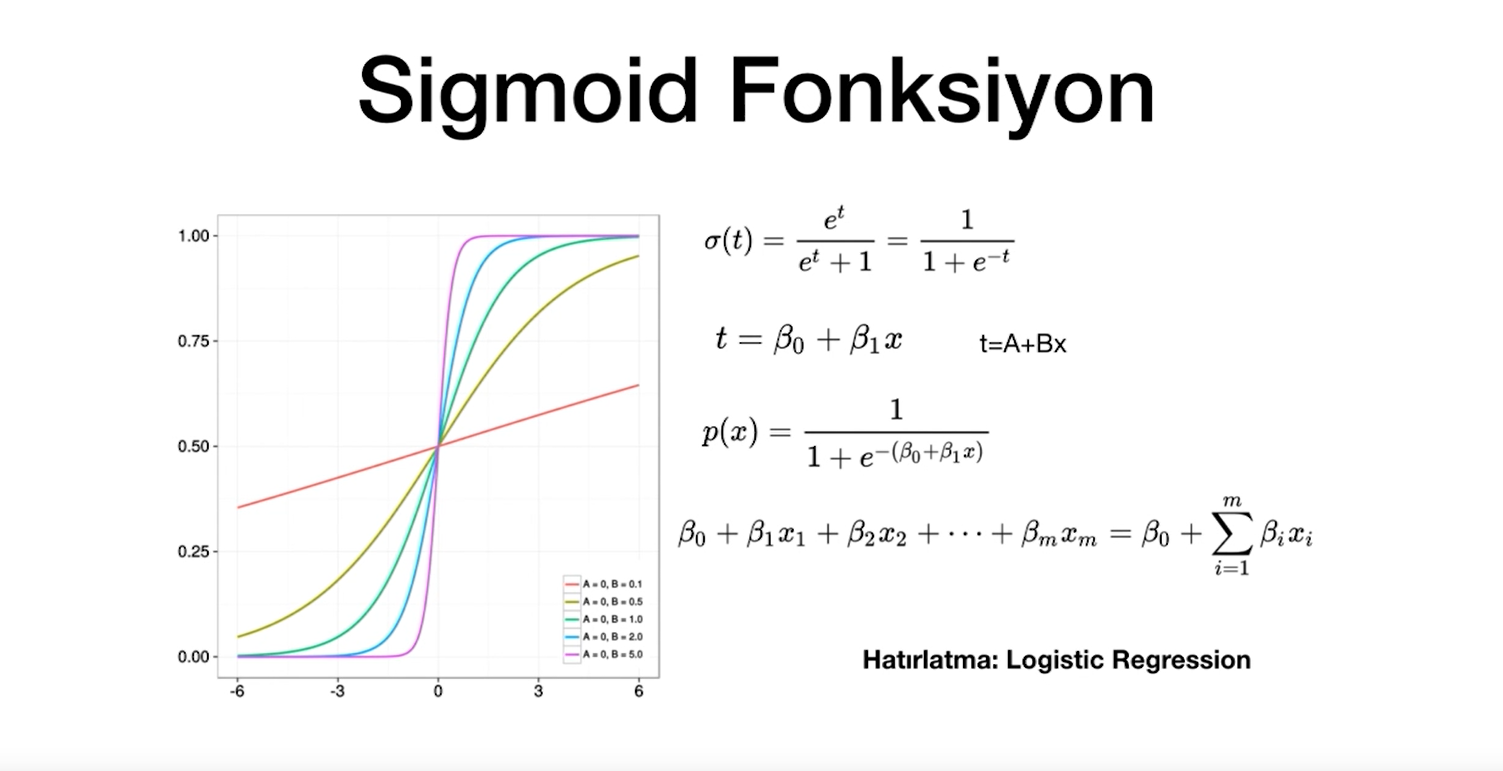
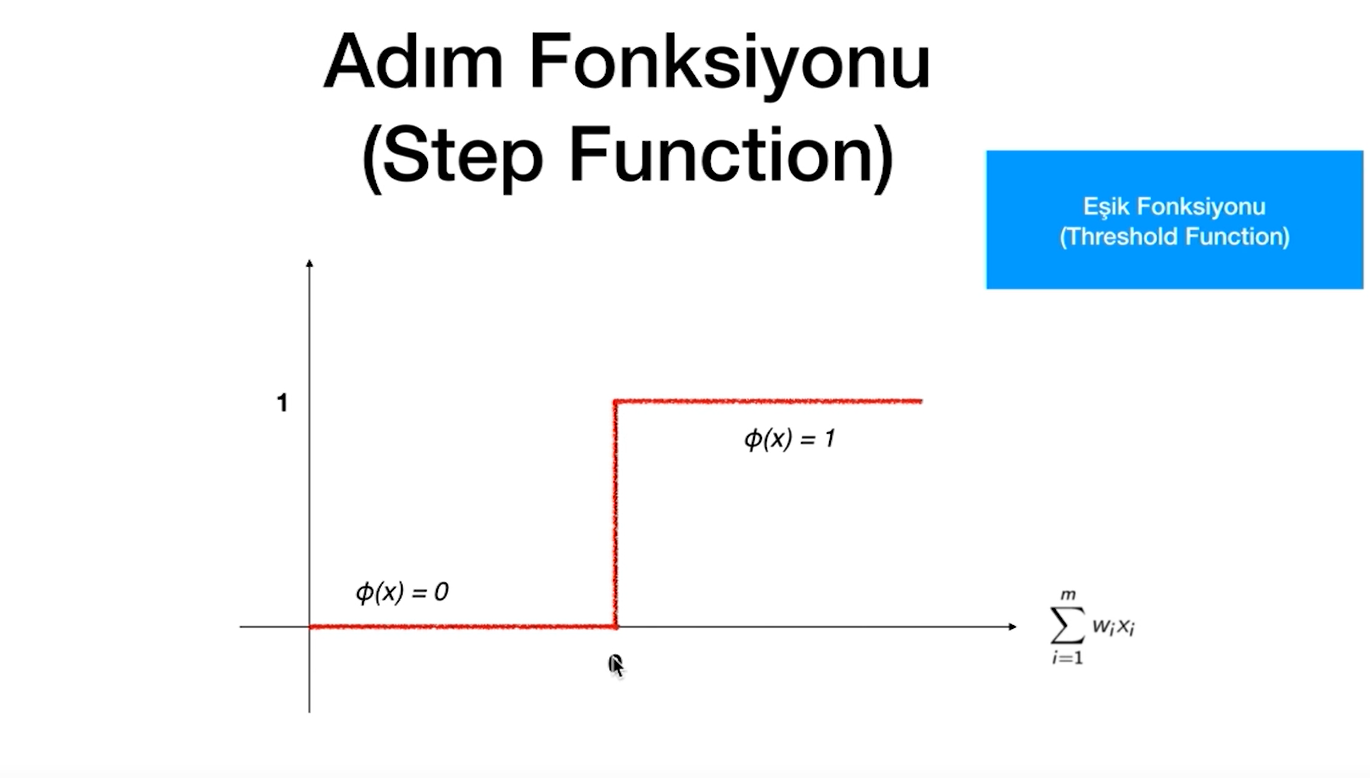
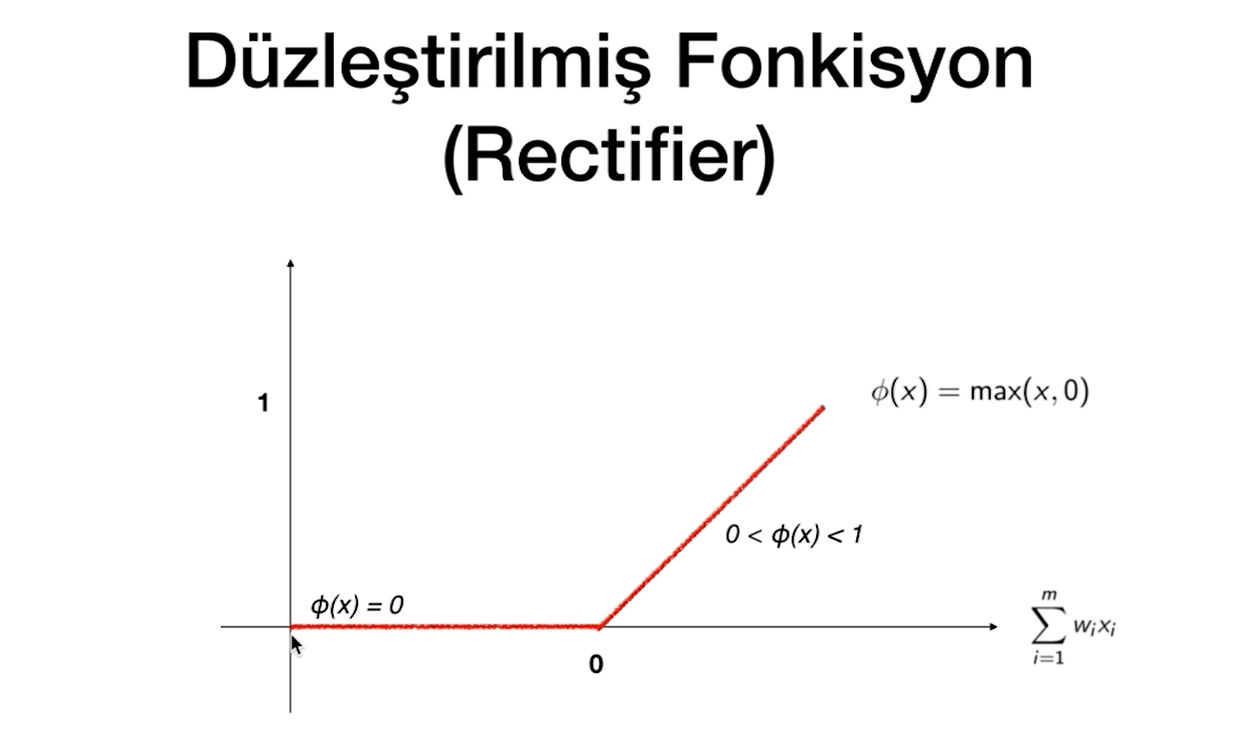
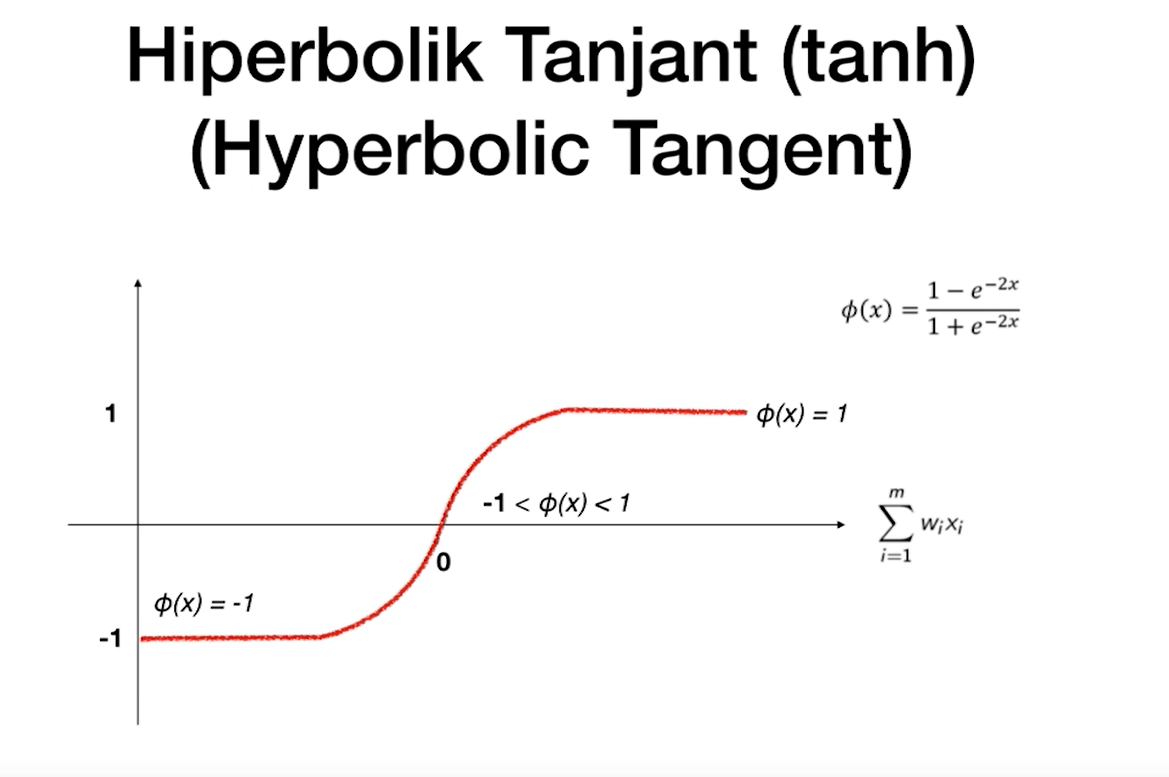
# Hidden Layer Kavramı
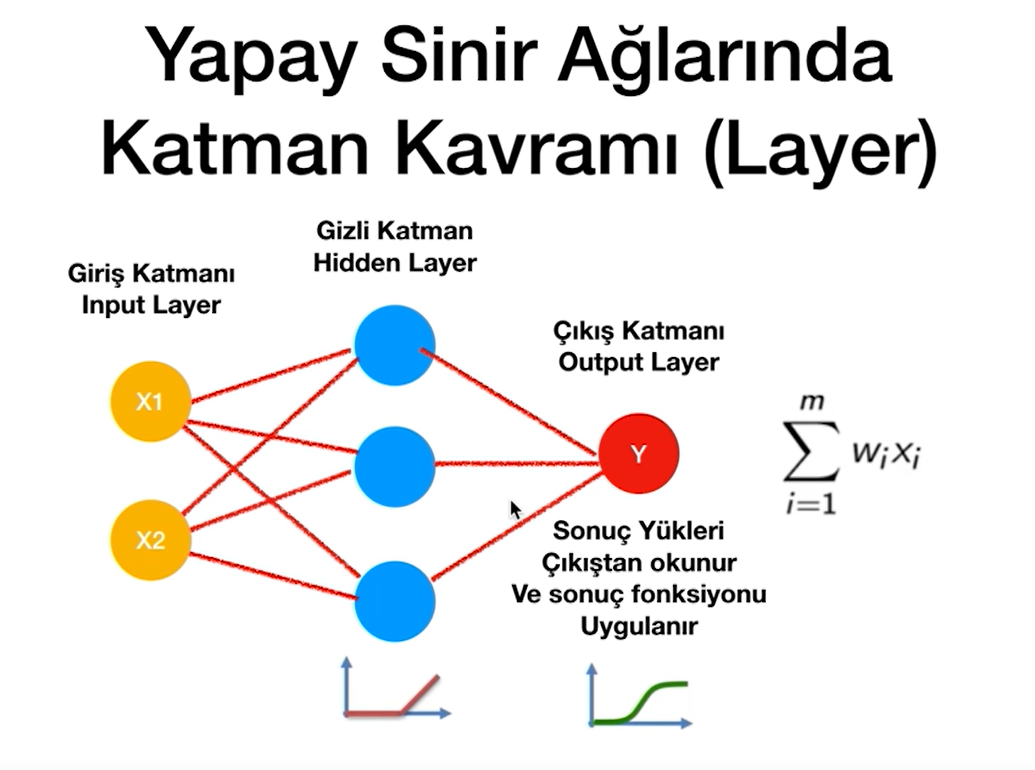
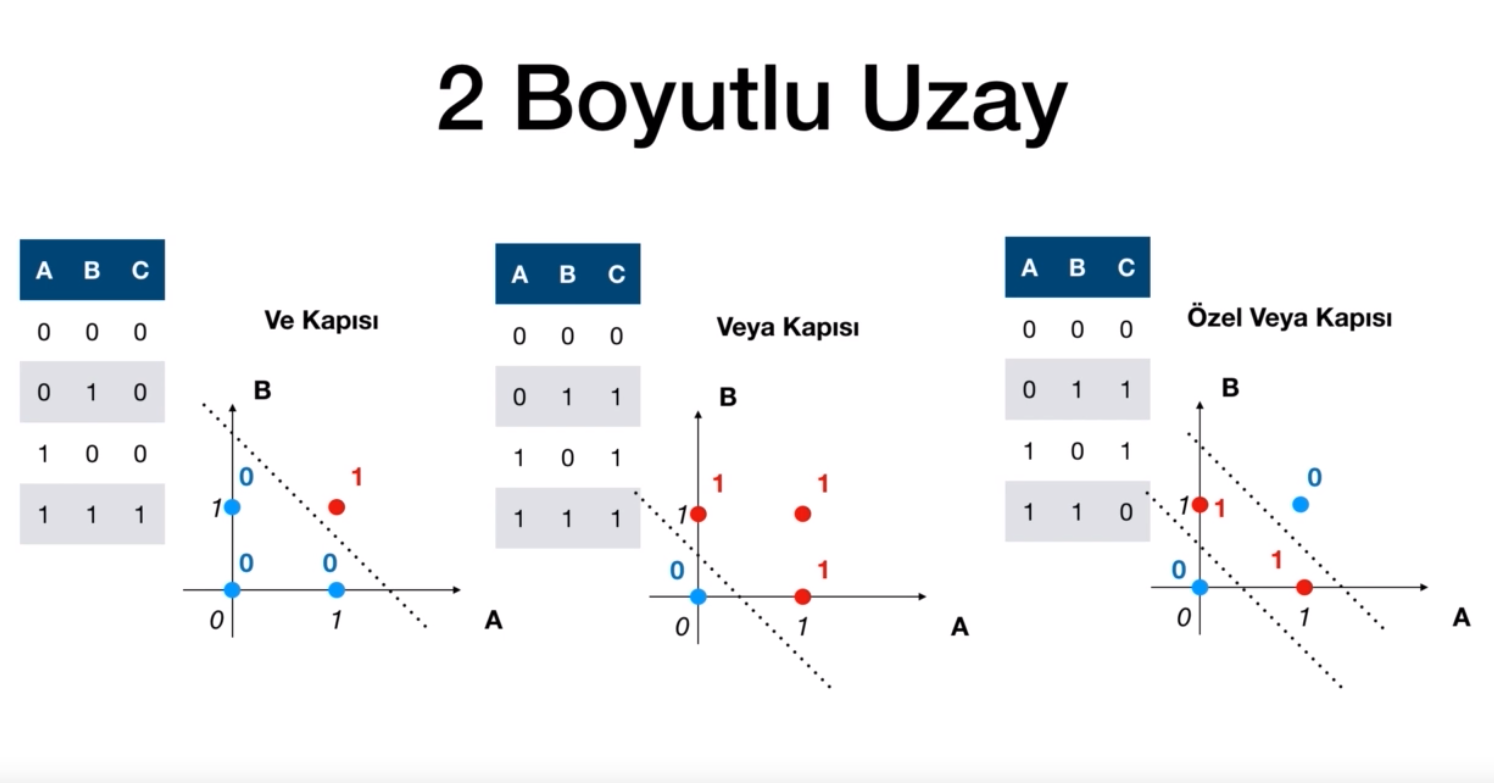
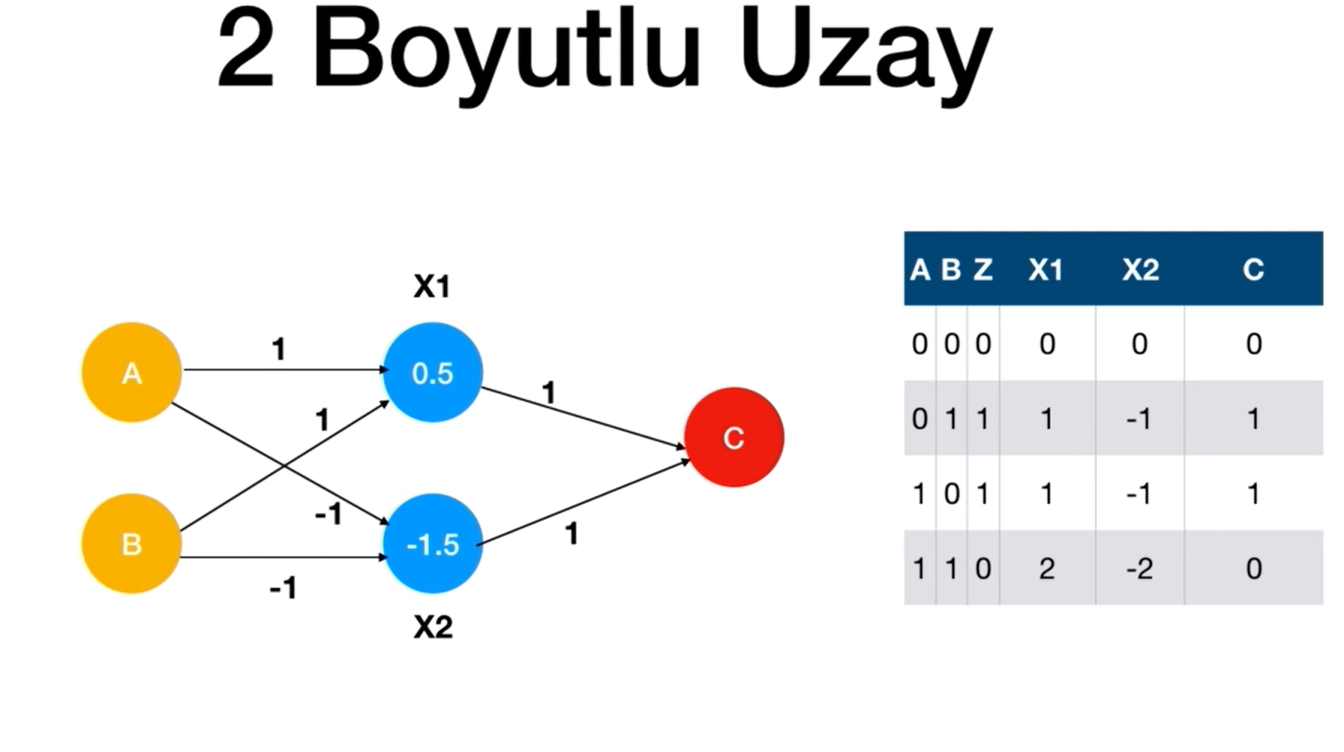
# Perceptron Kavramı
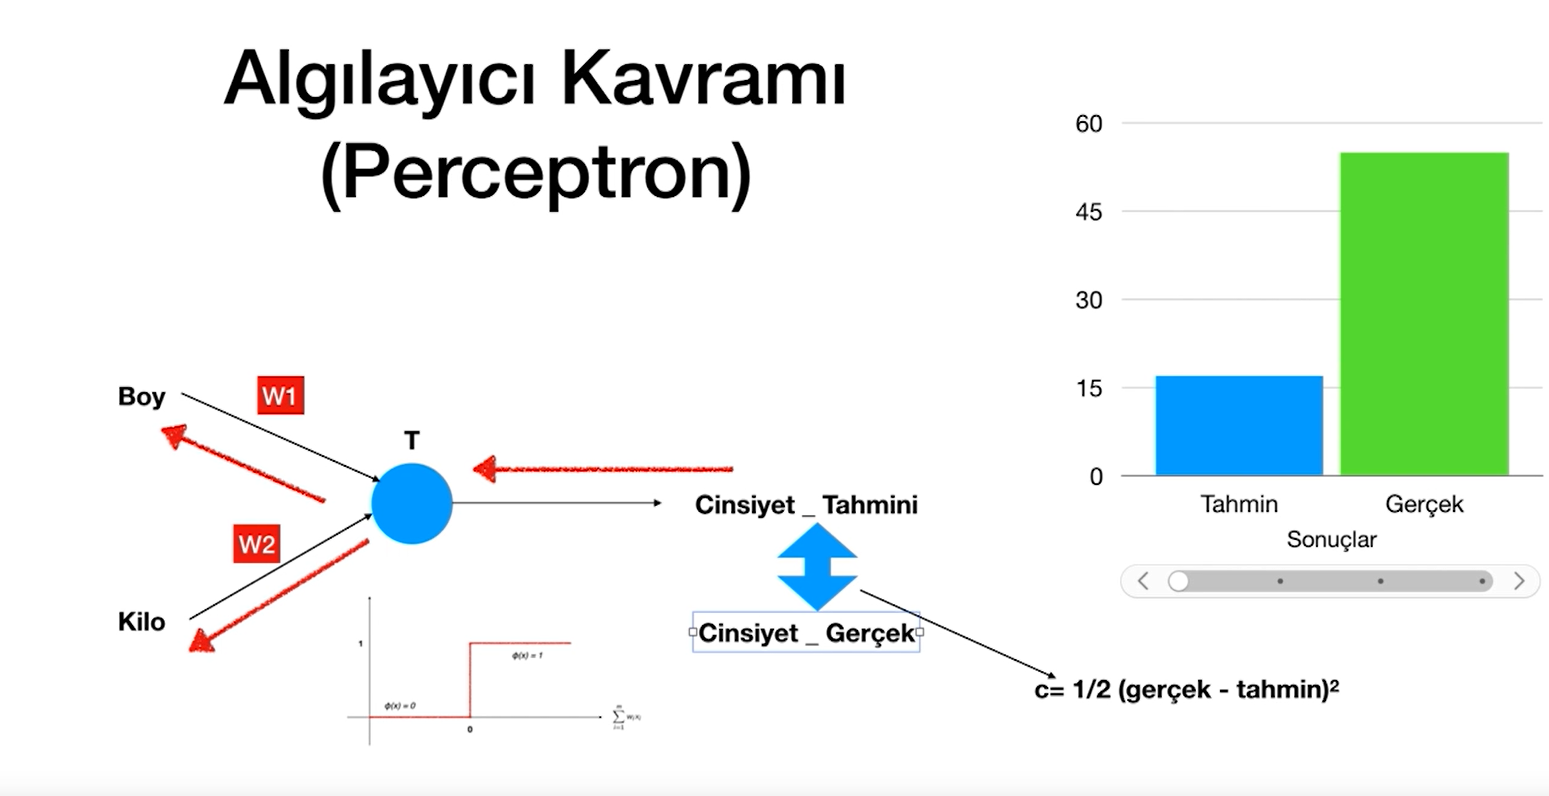
# Gradient Descent ve tipleri
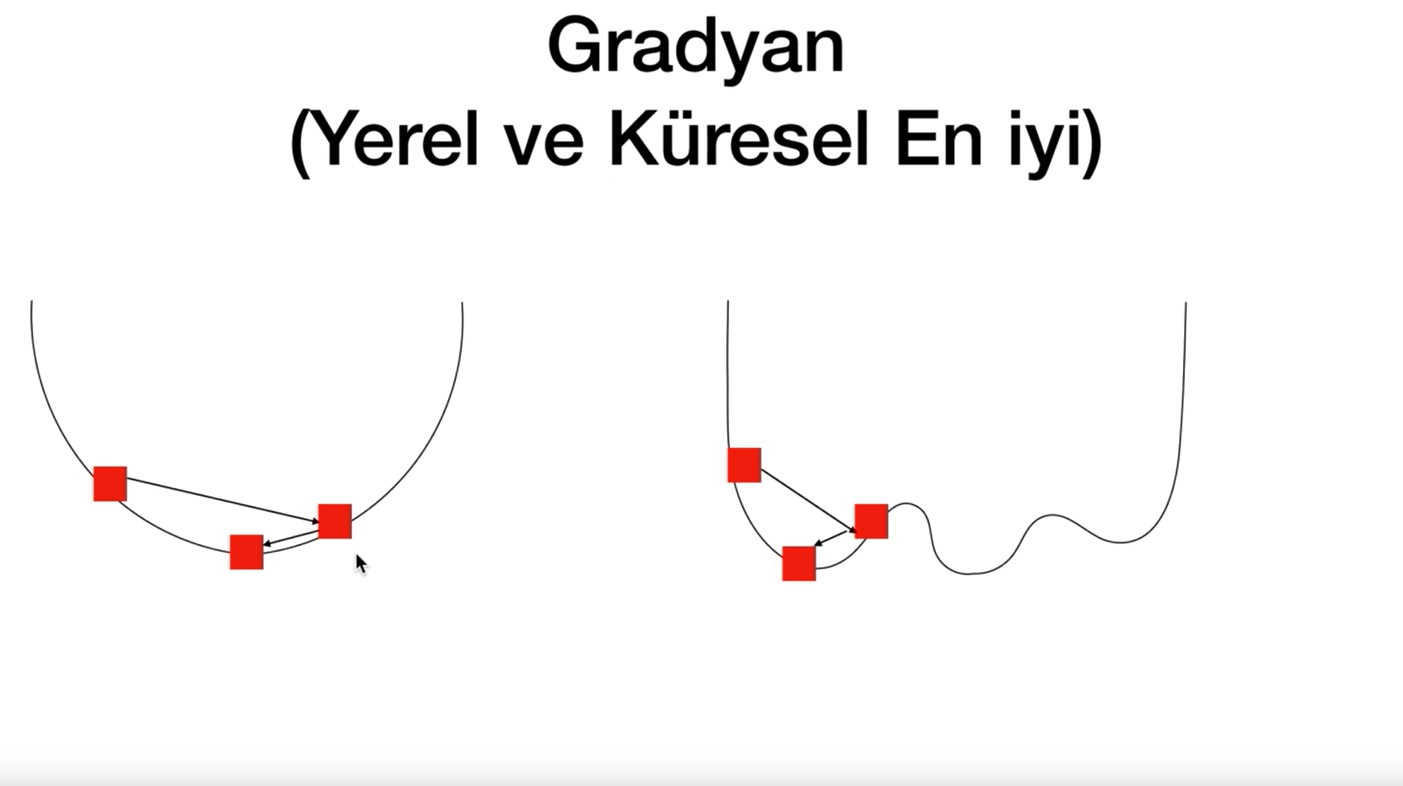
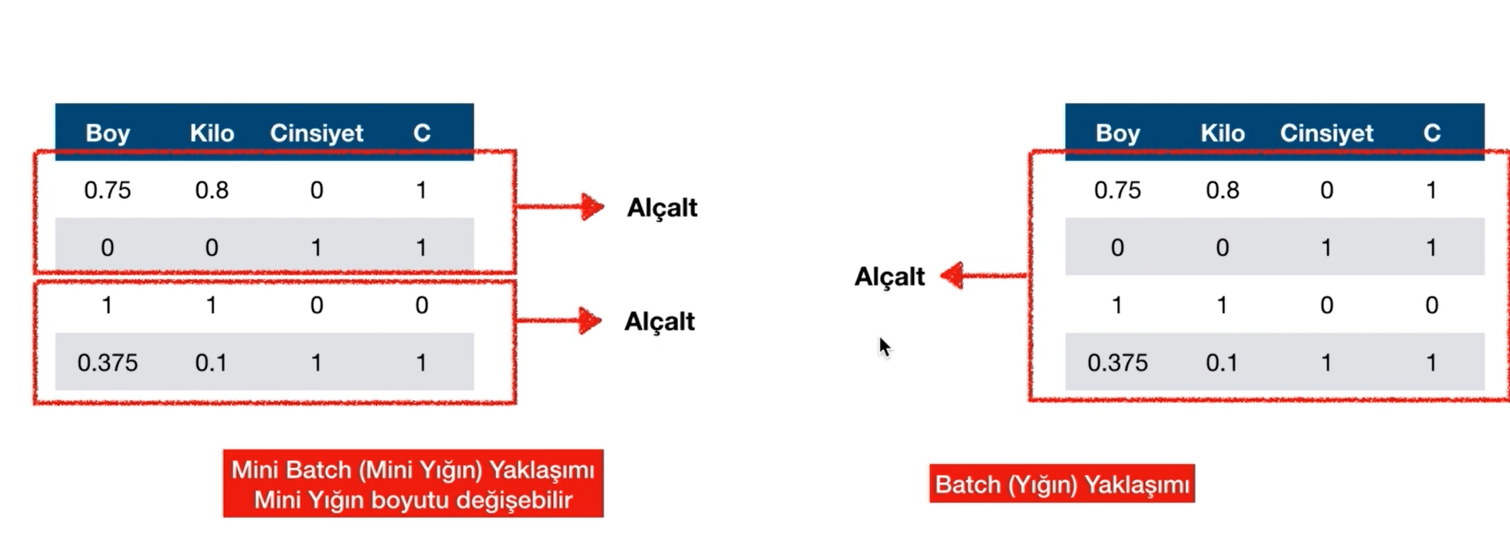
# Forward ve Backward Propagation
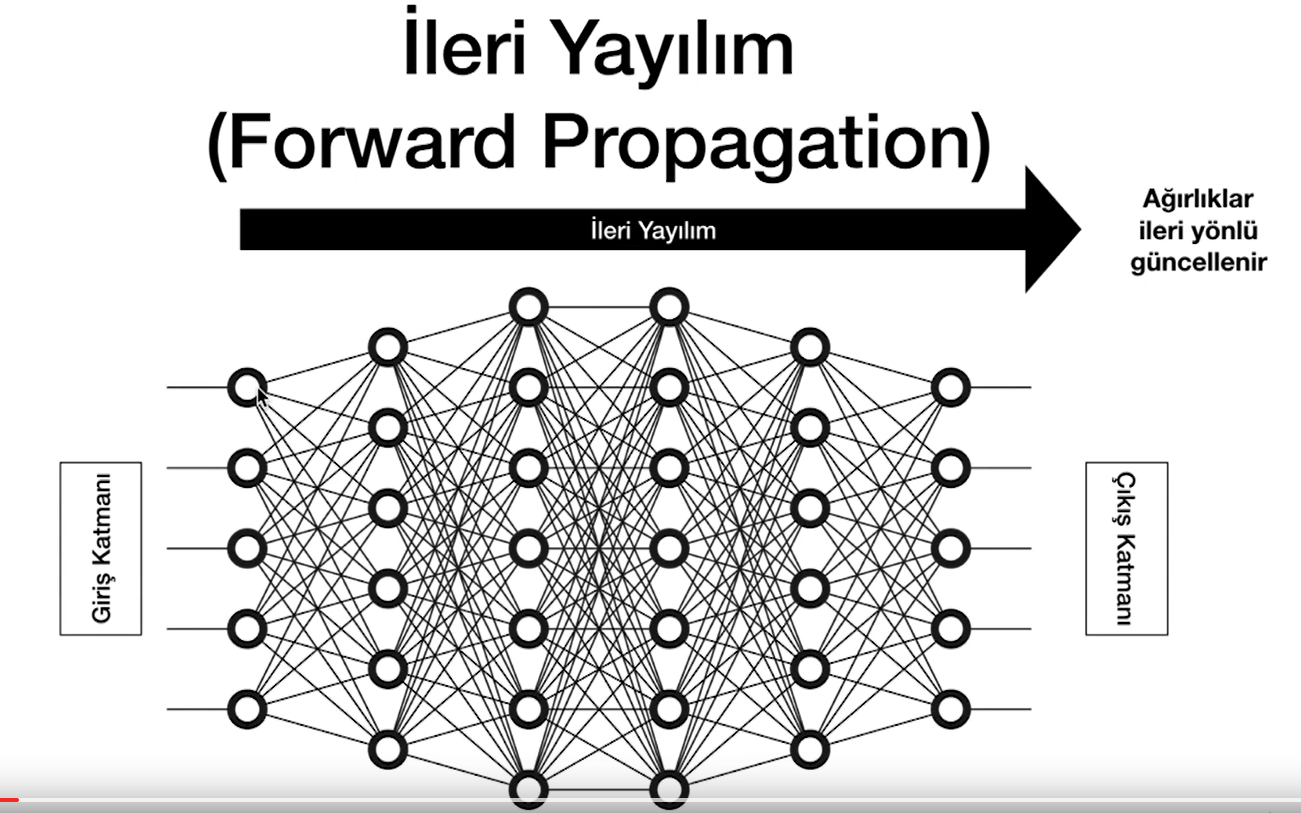
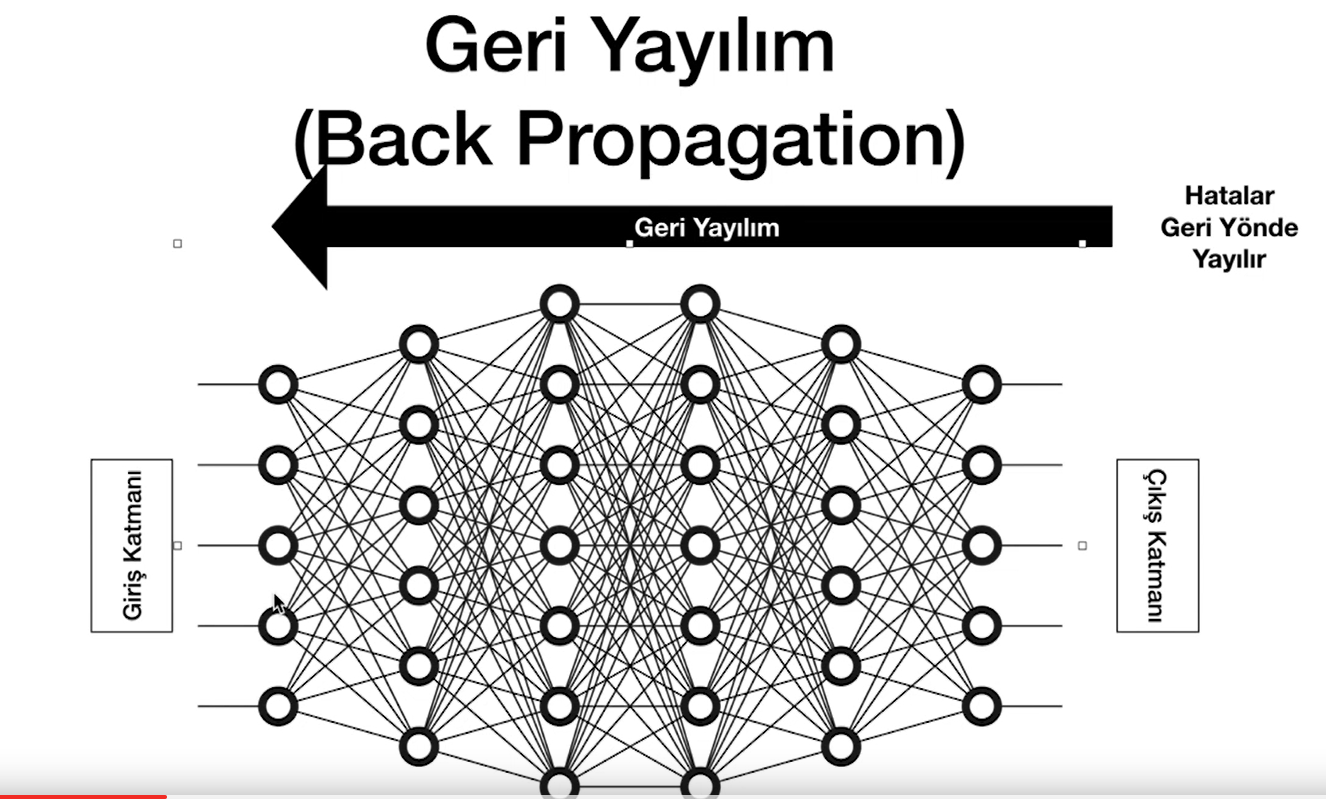
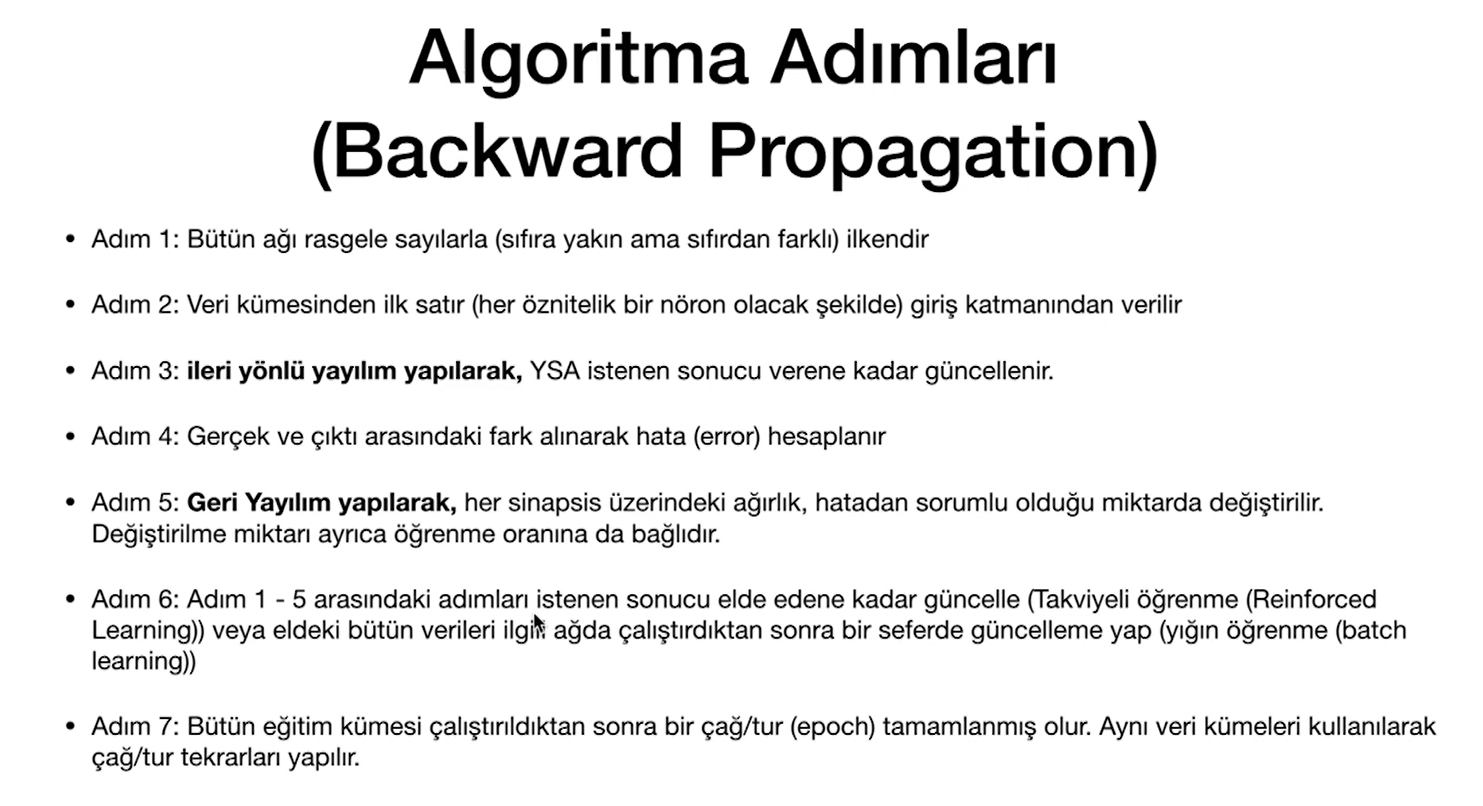

In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV, cross_val_score, cross_val_predict, train_test_split,StratifiedKFold, LeavePOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import warnings


warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import keras

In [3]:
data = pd.read_pickle('Churn_Modelling.pkl')

In [4]:
data[['Gender']].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [5]:
data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [6]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [7]:
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

### label encode işlemi içerisinde country ve gender encode işini X arrayinde halletmeyi unutmayalım. sonraki işlem olarak da one hot encoding işi ile ülkelerin her birini one-hot encode'a sokalım. ve tabii önemli bir parça, minmaxscaler ile normalizasyon işlemini X için uygulayalım

In [8]:
X = data.iloc[:,3:13].values
y = data.iloc[:,13].values


le1 = preprocessing.LabelEncoder()
X[:,1] = le1.fit_transform(X[:,1])

le2 = preprocessing.LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])


ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])], remainder='passthrough')
X = ohe.fit_transform(X)
X = X[:,1:]


# normalizasyon işlemini de gerçekleştirelim
minmax = MinMaxScaler()
X = minmax.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

### MLP Mimarisine geçebiliriz

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, kernel_initializer='uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units=6, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation = 'sigmoid'))

In [10]:
model.compile(optimizer = 'adam', loss =  'binary_crossentropy' , metrics = ['accuracy'] )

model.fit(X_train, y_train,epochs=50)

y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

conf_matrix = confusion_matrix(y_pred, y_test)

print(conf_matrix)
print(classification_report(y_pred, y_test))


Epoch 1/50
250/250 [==============================] - 1s 725us/step - loss: 0.6158 - accuracy: 0.7937
Epoch 2/50
250/250 [==============================] - 0s 708us/step - loss: 0.5018 - accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 0s 690us/step - loss: 0.4944 - accuracy: 0.7945
Epoch 4/50
250/250 [==============================] - 0s 685us/step - loss: 0.4877 - accuracy: 0.7945
Epoch 5/50
250/250 [==============================] - 0s 708us/step - loss: 0.4810 - accuracy: 0.7945
Epoch 6/50
250/250 [==============================] - 0s 679us/step - loss: 0.4743 - accuracy: 0.7945
Epoch 7/50
250/250 [==============================] - 0s 710us/step - loss: 0.4700 - accuracy: 0.7945
Epoch 8/50
250/250 [==============================] - 0s 655us/step - loss: 0.4661 - accuracy: 0.7945
Epoch 9/50
250/250 [==============================] - 0s 639us/step - loss: 0.4628 - accuracy: 0.7945
Epoch 10/50
250/250 [==============================] - 0s 632us/step - loss: 0.459

<Axes: >

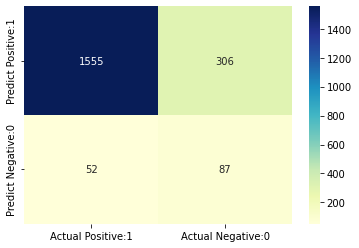

In [11]:
plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Şimdi deneme sırası bende. Bir adet kendime daha state-of-art bir model ve mini-batch gradient descent kullanmayı planlıyorum

In [12]:
data = pd.read_pickle('Churn_Modelling.pkl')

X = data.iloc[:,3:13].values
y = data.iloc[:,13].values


le1 = preprocessing.LabelEncoder()
X[:,1] = le1.fit_transform(X[:,1])

le2 = preprocessing.LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])


ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])], remainder='passthrough')
X = ohe.fit_transform(X)
X = X[:,1:]


# normalizasyon işlemini de gerçekleştirelim
minmax = MinMaxScaler()
X = minmax.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [13]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

model = Sequential()

model.add(Dense(32, kernel_initializer = 'normal', activation = 'relu',  input_dim = 11))
model.add(Dropout(rate = 0.05))
model.add(BatchNormalization())


model.add(Dense(16, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(rate = 0.05))
model.add(BatchNormalization())


model.add(Dense(8, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(rate = 0.05))
model.add(BatchNormalization())

model.add(Dense(4, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(rate = 0.05))
model.add(BatchNormalization())

model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))




In [14]:
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train,  epochs = 100,validation_split=0.2,batch_size=10)

print(model.evaluate(X_test, y_test))

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)

Epoch 1/100
640/640 [==============================] - 2s 1ms/step - loss: 0.5621 - accuracy: 0.7422 - val_loss: 0.4448 - val_accuracy: 0.8131
Epoch 2/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4474 - accuracy: 0.7966 - val_loss: 0.3987 - val_accuracy: 0.8313
Epoch 3/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4278 - accuracy: 0.8073 - val_loss: 0.3864 - val_accuracy: 0.8425
Epoch 4/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4129 - accuracy: 0.8216 - val_loss: 0.3717 - val_accuracy: 0.8319
Epoch 5/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4036 - accuracy: 0.8227 - val_loss: 0.3578 - val_accuracy: 0.8550
Epoch 6/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4082 - accuracy: 0.8150 - val_loss: 0.3488 - val_accuracy: 0.8575
Epoch 7/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4011 - accuracy: 0.8256 - val_loss: 0.3520 - val_accuracy: 0.8550

              precision    recall  f1-score   support

       False       0.97      0.84      0.90      1861
        True       0.22      0.63      0.33       139

    accuracy                           0.82      2000
   macro avg       0.59      0.73      0.61      2000
weighted avg       0.92      0.82      0.86      2000



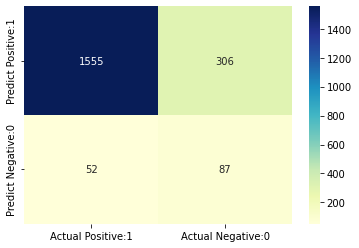

In [15]:
plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_pred, y_test))


### Bir adet Autoencoder modeli eğitmek istiyorum. Zaten amaç aynı: binary classification

In [16]:
data = pd.read_pickle('Churn_Modelling.pkl')

X = data.iloc[:,3:13].values
y = data.iloc[:,13].values

y_train = np.round(y_train).astype(int)
y_test = np.round(y_test).astype(int)

le1 = preprocessing.LabelEncoder()
X[:,1] = le1.fit_transform(X[:,1])

le2 = preprocessing.LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])


ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])], remainder='passthrough')
X = ohe.fit_transform(X)
X = X[:,1:]


# normalizasyon işlemini de gerçekleştirelim
minmax = MinMaxScaler()
X = minmax.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [17]:
from tensorflow.keras import layers, Model 

class AnomalyDetector(Model): 
    def __init__(self):
        super(AnomalyDetector, self).__init__() 
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(11, activation="relu")
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(11, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

autoencoder.compile(optimizer='adam', loss=tf.keras.losses.CosineSimilarity(axis=1))
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=30)


In [18]:
history = autoencoder.fit(
    X_train, X_train,  # Use X_train as both input and target (since it's an autoencoder)
    epochs=100,
    batch_size=64,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping],
    shuffle=True)

Epoch 1/100
125/125 [==============================] - 1s 2ms/step - loss: -0.8017 - val_loss: -0.8663
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: -0.8981 - val_loss: -0.9226
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: -0.9381 - val_loss: -0.9502
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: -0.9556 - val_loss: -0.9583
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: -0.9615 - val_loss: -0.9649
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: -0.9688 - val_loss: -0.9708
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: -0.9719 - val_loss: -0.9732
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: -0.9740 - val_loss: -0.9754
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: -0.9763 - val_loss: -0.9778
Epoch 10/100
125/125 [==============================] - 0s 1ms/step - los

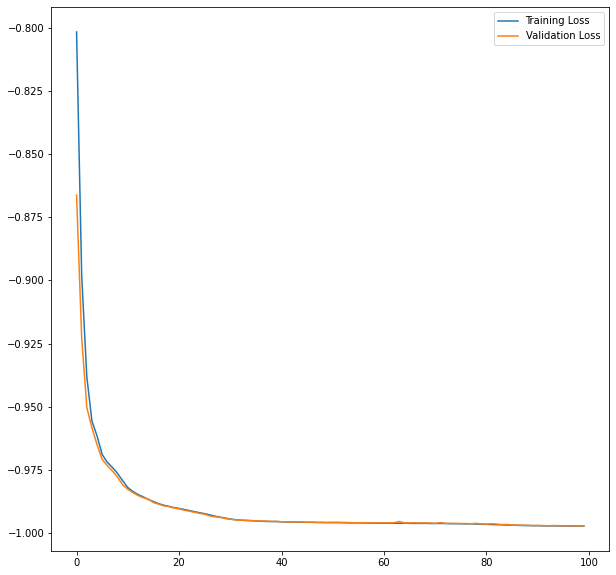

In [19]:
plt.figure(figsize=(10, 10))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()